### Using a dataset from your chosen domain (this could be a labeled image dataset or a structured CSV dataset with multiple features):
1. Apply PCA to reduce the dimensionality by identifying the principal components that
capture the most variance.
2. Apply LDA to project the data onto a lower-dimensional space, using the class labels
to maximize separation between classes.
3. Apply ICA to find statistically independent components in the dataset, which may
reveal underlying patterns or sources.



### Since get retrive the dataset from NOAA(NCEI)
https://www.ncei.noaa.gov/pub/data/cdo/samples/LCD_sample_pdf.pdf

https://www.ncei.noaa.gov/cdo-web/datasets

https://www.ncei.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf


In [1]:
#import the Neccessary Libaries
import pandas as pd
import numpy as np

In [3]:
#load the csv files
dataset=pd.read_csv('LCD_sample_csv.csv');
print(dataset)

        STATION                               STATION_NAME  ELEVATION  \
0    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
1    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
2    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
3    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
4    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
..          ...                                        ...        ...   
767  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
768  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
769  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
770  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
771  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   

     LATITUDE  LONGITUDE              DATE reportType  \
0      41.995   -87.9336  2014-03-01 00:51      FM-15   
1      41

In [4]:
dataset.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'reportType', 'HourlySkyConditions', 'HourlyVisibility',
       'HourlyPresentWeatherType', 'HourlyDryBulbTemperatureF',
       'HourlyDryBulbTemperatureC', 'HourlyWetBulbTemperatureF',
       'HourlyWetBulbTemperatureC', 'HourlyDewPointTemperatureF',
       'HourlyDewPointTemperatureC', 'HourlyRelativeHumidity',
       'HourlyWindSpeed', 'HourlyWindDirection', 'HourlyWindGustSpeed',
       'HourlyStationPressure', 'HourlyPressureTendency',
       'HourlyPressureChange', 'HourlySeaLevelPressure', 'HourlyPrecipitation',
       'HourlyAltimeterSetting', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature', 'DailyAverageDryBulbTemperature',
       'DailyDepartureFromNormalAverageTemperature',
       'DailyAverageRelativeHumidity', 'DailyAverageDewPointTemperature',
       'DailyAverageWetBulbTemperature', 'DailyHeatingDegreeDays',
       'DailyCoolingDegreeDays', 'DailySunrise', 'Da

### Exploratory Data Analysis

In [6]:
print(dataset.shape[1]) # columns
print(dataset.shape[0])# rows

86
772


In [9]:
print(dataset.size)
print(dataset.head())
print(dataset.tail())

66392
      STATION                               STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
1  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
2  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
3  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
4  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   

   LONGITUDE              DATE reportType  HourlySkyConditions  \
0   -87.9336  2014-03-01 00:51      FM-15  SCT:04 70 OVC:08 90   
1   -87.9336  2014-03-01 01:51      FM-15            OVC:08 50   
2   -87.9336  2014-03-01 02:51      FM-15            OVC:08 29   
3   -87.9336  2014-03-01 03:51      FM-15              VV:09 9   
4   -87.9336  2014-03-01 04:51      FM-15             OVC:08 8   

   HourlyVisibility HourlyPresentWeatherType  ...  \
0             10.00                      NaN  ...   
1   

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 86 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   STATION                                       772 non-null    object 
 1   STATION_NAME                                  772 non-null    object 
 2   ELEVATION                                     772 non-null    float64
 3   LATITUDE                                      772 non-null    float64
 4   LONGITUDE                                     772 non-null    float64
 5   DATE                                          772 non-null    object 
 6   reportType                                    772 non-null    object 
 7   HourlySkyConditions                           742 non-null    object 
 8   HourlyVisibility                              742 non-null    float64
 9   HourlyPresentWeatherType                      107 non-null    obj

In [12]:
dataset.describe()

,ELEVATION,LATITUDE,LONGITUDE,HourlyVisibility,HourlyDryBulbTemperatureF,HourlyDryBulbTemperatureC,HourlyWetBulbTemperatureF,HourlyWetBulbTemperatureC,HourlyDewPointTemperatureF,HourlyDewPointTemperatureC,...,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDD,MonthlyDepartureFromNormalCoolingDD
count,7.720000e+02,7.720000e+02,7.720000e+02,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.018000e+02,4.199500e+01,-8.793360e+01,9.230121,31.628032,-0.208356,27.723720,-2.368868,18.384097,-7.564825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.137605e-13,3.270616e-13,1.365126e-12,2.032510,12.196620,6.778430,11.076008,6.151487,11.859361,6.587330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.018000e+02,4.199500e+01,-8.793360e+01,0.500000,-1.000000,-18.300000,-2.000000,-19.200000,-17.000000,-27.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,22.000000,-5.600000,19.000000,-7.200000,9.000000,-12.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,32.000000,0.000000,28.500000,-1.950000,20.000000,-6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,40.000000,4.400000,36.000000,2.000000,28.000000,-2.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,67.000000,19.400000,59.000000,15.200000,47.000000,8.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataset['HourlyPresentWeatherType'].unique()

array([nan, '-SN:03 |SN:71 |', 'HZ:7 |FU:05 |HZ:05', 'SN:03 |SN:72 s |',
       'HZ:7 ||HZ:05', '-RA:02 |RA:61 |',
       '-RA:02 SN:03 |RA:61 RA:67 SN:71 |', '-SN:03 BR:1 |SN:71 |',
       '-SN:03 SN:03 |SN:71 |', '-RA:02 BR:1 |RA:61 |',
       'SN:03 FG:2 |FG:35 SN:72 |', '-RA:02 PL:06 |RA:61 PL:74 |',
       '-DZ:01 |DZ:51 |', 'RA:02 |RA:62 |', '-DZ:01 BR:1 |DZ:51 |'],
      dtype=object)

In [15]:
print(dataset['HourlyDryBulbTemperatureC'].describe())  # Inspect a numerical column

count    742.000000
mean      -0.208356
std        6.778430
min      -18.300000
25%       -5.600000
50%        0.000000
75%        4.400000
max       19.400000
Name: HourlyDryBulbTemperatureC, dtype: float64


In [16]:
### Train test split 

In [29]:
Xfeatures = [
    'HourlyDryBulbTemperatureC', 
    'HourlyRelativeHumidity', 
    'HourlyWindSpeed', 
    'HourlyStationPressure', 
    'HourlyPrecipitation'
]
X = dataset[Xfeatures]

# check for missing values and fill them using mean since those are numerical values
print(X.columns)
print(X.isnull().sum())
#print(X['HourlyPrecipitation'].mean())

#X = X.fillna(X.mean()) --->error
print(X.dtypes)  #--->HourlyPrecipitation is object dtype



Index(['HourlyDryBulbTemperatureC', 'HourlyRelativeHumidity',
       'HourlyWindSpeed', 'HourlyStationPressure', 'HourlyPrecipitation'],
      dtype='object')
HourlyDryBulbTemperatureC     30
HourlyRelativeHumidity        30
HourlyWindSpeed               30
HourlyStationPressure         30
HourlyPrecipitation          652
dtype: int64
HourlyDryBulbTemperatureC    float64
HourlyRelativeHumidity       float64
HourlyWindSpeed              float64
HourlyStationPressure        float64
HourlyPrecipitation           object
dtype: object


In [30]:
X['HourlyPrecipitation'].unique()

array([nan, '0.01s', '0.03', '0.01', 'T', '0.060.05s', '0.04', '0.02',
       '0.020.03s', '0.08', '0.07', '0.21', '0.05', '0.02s'], dtype=object)

In [31]:
# converting the HourlyPrecipitation str to numerical datatype
X['HourlyPrecipitation']=X['HourlyPrecipitation'].map({'nan':0, '0.01s':0.01, '0.03':0.03,
                                                       '0.01':0.01, 'T':0, '0.060.05s':0.06, '0.04':0.04, '0.02':0.02,
       '0.020.03s':0.20, '0.08':0.08, '0.07':0.07, '0.21':0.21, '0.05':0.05, '0.02s':0.20})

C:\Users\lsrin\AppData\Local\Temp\ipykernel_14120\42212108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HourlyPrecipitation']=X['HourlyPrecipitation'].map({'nan':0, '0.01s':0.01, '0.03':0.03,


In [38]:
print(X.dtypes)
#handling the misiing values
print(X.isnull().sum())
X = X.fillna(X.mean())

HourlyDryBulbTemperatureC    float64
HourlyRelativeHumidity       float64
HourlyWindSpeed              float64
HourlyStationPressure        float64
HourlyPrecipitation          float64
dtype: object
HourlyDryBulbTemperatureC     30
HourlyRelativeHumidity        30
HourlyWindSpeed               30
HourlyStationPressure         30
HourlyPrecipitation          652
dtype: int64


In [39]:
X.isnull().sum()

HourlyDryBulbTemperatureC    0
HourlyRelativeHumidity       0
HourlyWindSpeed              0
HourlyStationPressure        0
HourlyPrecipitation          0
dtype: int64

In [58]:
# Y Features
y = dataset['HourlyPresentWeatherType']  # Target variable
print(y.dtype)
print(y.unique())

object
[nan '-SN:03 |SN:71 |' 'HZ:7 |FU:05 |HZ:05' 'SN:03 |SN:72 s |'
 'HZ:7 ||HZ:05' '-RA:02 |RA:61 |' '-RA:02 SN:03 |RA:61 RA:67 SN:71 |'
 '-SN:03 BR:1 |SN:71 |' '-SN:03 SN:03 |SN:71 |' '-RA:02 BR:1 |RA:61 |'
 'SN:03 FG:2 |FG:35 SN:72 |' '-RA:02 PL:06 |RA:61 PL:74 |'
 '-DZ:01 |DZ:51 |' 'RA:02 |RA:62 |' '-DZ:01 BR:1 |DZ:51 |']


In [63]:
print(y.value_counts())
y.isnull().sum()
y = y.fillna(y.mode()[0])

HourlyPresentWeatherType
-SN:03 |SN:71 |                      714
-RA:02 |RA:61 |                       23
HZ:7 |FU:05 |HZ:05                    15
-SN:03 BR:1 |SN:71 |                   4
-RA:02 BR:1 |RA:61 |                   4
-DZ:01 |DZ:51 |                        3
-SN:03 SN:03 |SN:71 |                  2
SN:03 |SN:72 s |                       1
HZ:7 ||HZ:05                           1
-RA:02 SN:03 |RA:61 RA:67 SN:71 |      1
SN:03 FG:2 |FG:35 SN:72 |              1
-RA:02 PL:06 |RA:61 PL:74 |            1
RA:02 |RA:62 |                         1
-DZ:01 BR:1 |DZ:51 |                   1
Name: count, dtype: int64


0

In [64]:
print(y.unique())

['-SN:03 |SN:71 |' 'HZ:7 |FU:05 |HZ:05' 'SN:03 |SN:72 s |' 'HZ:7 ||HZ:05'
 '-RA:02 |RA:61 |' '-RA:02 SN:03 |RA:61 RA:67 SN:71 |'
 '-SN:03 BR:1 |SN:71 |' '-SN:03 SN:03 |SN:71 |' '-RA:02 BR:1 |RA:61 |'
 'SN:03 FG:2 |FG:35 SN:72 |' '-RA:02 PL:06 |RA:61 PL:74 |'
 '-DZ:01 |DZ:51 |' 'RA:02 |RA:62 |' '-DZ:01 BR:1 |DZ:51 |']


In [65]:

# import the regular expression module
import re

# Simplification function
def SimplifiedVersion(value):
    if value == 'Unknown':
        return 'Unknown'
    # Extract the first uppercase weather type (e.g., SN, HZ, DZ)
    match = re.search(r'[A-Z]+', value)
    return match.group(0) if match else 'Other'

# apply the simplification function
y = y.apply(SimplifiedVersion)

# unique values in the simplified target
print(y.unique())


['SN' 'HZ' 'RA' 'DZ']


In [66]:
y.value_counts()

HourlyPresentWeatherType
SN    722
RA     30
HZ     16
DZ      4
Name: count, dtype: int64

### Train_test_split method

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#feature StandardScaler sc
sc=StandardScaler();
X_FeaturesScaled=sc.fit_transform(X);
#print(X_FeaturesScaled)

#train test split
X_train,X_test,y_train,y_test=train_test_split(X_FeaturesScaled,y,test_size=0.30,random_state=24)


In [75]:
#let check the X_train
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(540, 5)
(232, 5)
(540,)
(232,)


### Dimensionality reduction
1. Apply PCA(US) to reduce the dimensionality by identifying the principal components that
capture the most variance.
2. Apply LDA(S) to project the data onto a lower-dimensional space, using the class labels -->within classes and blw the classes

to maximize separation between classes.
3. Apply ICA (US)to find statistically independent components in the dataset, which may
to make the component independent


### PCA

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
x_train_pca=pca.fit_transform(X_train);
x_test_pca=pca.transform(X_test);
pca

PCA(n_components=0.95)

### LDA

In [93]:
#IMPORT THE libaraies
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 


# Compute number of LDA components
n_classes = len(np.unique(y))  # no of unique classes
print("The number of unqiue classes :",n_classes);

LDA=LinearDiscriminantAnalysis(n_components=n_classes - 1)  # max number of components is n_classes - 1

print("Number of LDA components:", n_classes - 1) 
print(LDA)

X_train_lda = LDA.fit_transform(X_train,y_train)
X_test_lda = LDA.transform(X_test)

The number of unqiue classes : 4
Number of LDA components: 3
LinearDiscriminantAnalysis(n_components=3)


### ICA

In [94]:
from sklearn.decomposition import FastICA
ica=FastICA(n_components=5,random_state=34)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)
ica

c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


FastICA(n_components=5, random_state=34)

###After performing each dimensionality reduction technique, train a classifier (e.g., k-Nearest
Neighbors or SVM) on the reduced datasets for both image and CSV formats. Compare and
analyze the classification accuracy for each method to evaluate which technique best
preserves meaningful features and classification performance in your chosen domain.

Training Phase:
KNN doesn’t explicitly train a model. It stores all the training data points (this is called a lazy learner algorithm).
Prediction Phase:
When a new data point needs to be classified or predicted:
Calculate the distance between the new point and all points in the training data (commonly using Euclidean distance).
Identify the 
𝐾
K-nearest neighbors (smallest distances). 

A small 
𝐾(e.g., 1) makes the algorithm sensitive to noise.
A large 
𝐾smooths predictions but might lose detail.

In [95]:
### Knn and Svm
# import the classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC #support vector Machine

classifiers = {
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear', random_state=42)
}

In [96]:
from sklearn.metrics import accuracy_score
#It measures the proportion of correctly predicted labels
#  out of the total number of predictions.
from sklearn.metrics import classification_report
#It provides metrics like precision( accuracy of positive prediction)
#  recall(accuracy of positive actual values), F1-score, 
# and support for each class.

In [99]:
results = {}
for name, clf in classifiers.items():
    # PCA
    clf.fit(x_train_pca, y_train)
    y_pred_pca = clf.predict(x_test_pca)
    results[f"{name}_PCA"] = accuracy_score(y_test, y_pred_pca)
    
    # LDA
    clf.fit(X_train_lda, y_train)
    y_pred_lda = clf.predict(X_test_lda)
    results[f"{name}_LDA"] = accuracy_score(y_test, y_pred_lda)
    
    # ICA
    clf.fit(X_train_ica, y_train)
    y_pred_ica = clf.predict(X_test_ica)
    results[f"{name}_ICA"] = accuracy_score(y_test, y_pred_ica)

# Step 8: Display Results
print("Classification Results:")
for method, score in results.items():
    print(f"{method}: Accuracy = {score:.2f}")


Classification Results:
k-NN_PCA: Accuracy = 0.95
k-NN_LDA: Accuracy = 0.95
k-NN_ICA: Accuracy = 0.96
SVM_PCA: Accuracy = 0.95
SVM_LDA: Accuracy = 0.95
SVM_ICA: Accuracy = 0.95


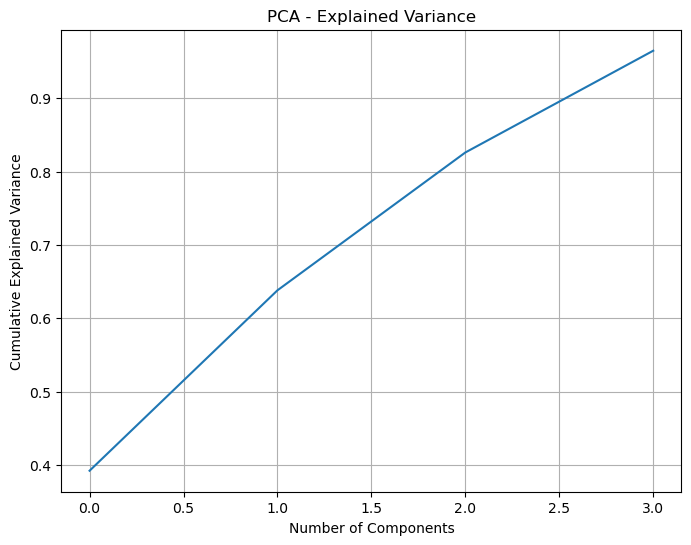

In [100]:
# Step 9: Optional - Visualize PCA Explained Variance
# measure that indicates how much variance is explained by each principal component in PCA
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [101]:
from sklearn.metrics import classification_report

# Example for PCA
print(f"Classification Report for {name} using PCA:")
print(classification_report(y_test, y_pred_pca))


Classification Report for SVM using PCA:
              precision    recall  f1-score   support

          HZ       0.00      0.00      0.00         5
          RA       0.62      0.62      0.62         8
          SN       0.96      0.99      0.98       219

    accuracy                           0.95       232
   macro avg       0.53      0.54      0.53       232
weighted avg       0.93      0.95      0.94       232



c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
